# Clustering data

## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


## Importing data set

In [4]:
data = pd.read_excel('Data Fiver.xlsx')
print(data.head())

      Spieler      Tore  Torvorlage  Progressive Pässe  Rückpässe  \
0  E. Haaland  5.784805    0.924841          -2.099532  -0.527450   
1   J. Sancho  3.239380    5.564156           0.198022   2.474467   
2  J. Kimmich -0.175215    1.768353           1.397004   1.372626   
3  K. Havertz  1.873542    0.713963          -0.254736   2.154695   
4   A. Davies  0.011036    0.503085           0.779202   1.570474   

   seitliche Pässe  lange Pässe  kurze Pässe  Dribbeln  Grätschen  ...  \
0        -1.350979    -2.142148    -1.430170  0.100861  -1.392833  ...   
1         0.620473    -1.272420     1.427465  1.393588  -1.392833  ...   
2         1.908364     1.548869     1.899620 -0.352134   0.917628  ...   
3         0.047055    -0.646972     0.890738  1.104575  -0.797036  ...   
4         1.046607    -0.587813     1.426581  1.400708   0.090625  ...   

    Schüsse  Ballberührungen im 16er  erlittene Fouls   Flanken  \
0  1.524427                 1.783461        -1.061558 -0.433364   
1  0.9

## Removing the Player , we will deal with Descriptive features only.

In [5]:
descriptive_features = data.iloc[:,1:]
descriptive_features

,Tore,Torvorlage,Progressive Pässe,Rückpässe,seitliche Pässe,lange Pässe,kurze Pässe,Dribbeln,Grätschen,Abfangen,...,Schüsse,Ballberührungen im 16er,erlittene Fouls,Flanken,clevere Pässe,Progressive Läufe,Besschleunigungen,erhaltene Pässe,Angriffsläufe,Fouls
0,5.784805,0.924841,-2.099532,-0.527450,-1.350979,-2.142148,-1.430170,0.100861,-1.392833,-1.073046,...,1.524427,1.783461,-1.061558,-0.433364,0.068768,-0.250572,-0.161448,-1.136759,0.772772,-0.553050
1,3.239380,5.564156,0.198022,2.474467,0.620473,-1.272420,1.427465,1.393588,-1.392833,-1.327431,...,0.994731,1.664423,-0.810551,0.308628,2.225275,1.891940,1.547451,1.531222,3.045627,-1.824754
2,-0.175215,1.768353,1.397004,1.372626,1.908364,1.548869,1.899620,-0.352134,0.917628,1.177042,...,-0.389088,-0.488539,0.399594,0.501108,1.156993,0.085164,-0.528285,1.961430,1.891424,-0.705659
3,1.873542,0.713963,-0.254736,2.154695,0.047055,-0.646972,0.890738,1.104575,-0.797036,-0.661339,...,1.053056,1.492230,0.155675,-0.008817,0.955218,1.017857,0.916497,0.981757,1.739431,-0.727938
4,0.011036,0.503085,0.779202,1.570474,1.046607,-0.587813,1.426581,1.400708,0.090625,1.710778,...,-0.701413,0.409628,0.371839,1.230801,0.087508,1.814248,1.259604,1.161058,0.691518,-0.385413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,-0.733966,0.081329,0.848617,-1.991376,0.860062,0.798960,0.369085,-1.951584,0.299024,1.286284,...,-1.156367,-0.585955,-1.381500,-1.181373,-1.035425,-0.752440,-1.432215,0.265115,-1.072731,0.479787
1273,1.749375,-0.762183,-1.952773,0.170887,-1.448086,-1.783394,-1.414592,0.414955,-1.392833,-0.835924,...,1.019894,1.108325,0.200084,-0.838141,-1.262574,-0.177506,-0.054467,-1.357008,0.344816,-0.750341
1274,-0.733966,-0.762183,0.734451,-0.561013,0.532536,1.248445,0.126650,-0.276228,0.066707,0.054994,...,-1.713187,-1.133146,-0.540483,0.807511,-0.799180,0.243341,-0.272848,0.336782,-0.650954,0.275861
1275,-0.733966,-0.762183,0.486326,0.060247,0.699246,1.324764,0.371126,-0.543247,2.351819,0.027803,...,-0.374453,-1.690191,0.521616,-0.214257,-1.262574,-0.189544,-1.059609,0.205447,0.591288,-0.447465


## Converting in to np Array

In [53]:
descriptive_features = data.iloc[:,1:].values
descriptive_features

(array([[ 5.78480479,  0.92484095, -2.09953172, ...,  1.        ,
          3.        ,  1.        ],
        [ 3.23937984,  5.56415562,  0.19802171, ...,  7.        ,
          1.        ,  3.        ],
        [-0.17521461,  1.76835271,  1.39700416, ...,  2.        ,
          0.        ,  0.        ],
        ...,
        [-0.73396643, -0.76218256,  0.73445102, ...,  6.        ,
          2.        ,  2.        ],
        [-0.73396643, -0.76218256,  0.486326  , ...,  6.        ,
          0.        ,  4.        ],
        [ 0.50770428,  1.34659683, -1.1336849 , ...,  1.        ,
          3.        ,  1.        ]]),
 numpy.ndarray)

## Finding the optimum number of clusters for k-means classification

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are. This is what the KMeans tries to minimize with each iteration.

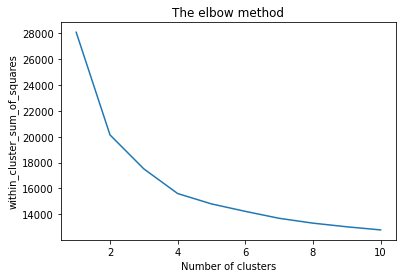

In [7]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(descriptive_features)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()


## Apply K-means Clustering for 4 clusters

In [11]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
k_means_4_clusters = kmeans.fit_predict(descriptive_features)

In [12]:
k_means_4_clusters

array([1, 2, 3, ..., 3, 3, 1], dtype=int32)

## checking size of each cluster

In [13]:
count_arr = np.bincount(k_means_4_clusters)
print(count_arr)

[263 221 296 497]


## Apply K-means Clustering for 8 clusters

In [14]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
k_means_8_clusters = kmeans.fit_predict(descriptive_features)

In [16]:
k_means_8_clusters


array([2, 0, 6, ..., 4, 1, 2], dtype=int32)

## checking size of each cluster

In [17]:
count_arr = np.bincount(k_means_8_clusters)
print(count_arr)

[118 180 162 209 193 144 155 116]


## Adding Cluster column in to CSV File

In [21]:
df = pd.DataFrame(data=k_means_4_clusters,columns=["Column1"])
data = data.assign(Kmeans_4_clusters =k_means_4_clusters)
df = pd.DataFrame(data=k_means_8_clusters,columns=["Column1"])
data = data.assign(Kmeans_8_clusters =k_means_8_clusters)


#print(data)
data.to_csv('Clustered.csv')
print(data.head())

      Spieler      Tore  Torvorlage  Progressive Pässe  Rückpässe  \
0  E. Haaland  5.784805    0.924841          -2.099532  -0.527450   
1   J. Sancho  3.239380    5.564156           0.198022   2.474467   
2  J. Kimmich -0.175215    1.768353           1.397004   1.372626   
3  K. Havertz  1.873542    0.713963          -0.254736   2.154695   
4   A. Davies  0.011036    0.503085           0.779202   1.570474   

   seitliche Pässe  lange Pässe  kurze Pässe  Dribbeln  Grätschen  ...  \
0        -1.350979    -2.142148    -1.430170  0.100861  -1.392833  ...   
1         0.620473    -1.272420     1.427465  1.393588  -1.392833  ...   
2         1.908364     1.548869     1.899620 -0.352134   0.917628  ...   
3         0.047055    -0.646972     0.890738  1.104575  -0.797036  ...   
4         1.046607    -0.587813     1.426581  1.400708   0.090625  ...   

    Flanken  clevere Pässe  Progressive Läufe  Besschleunigungen  \
0 -0.433364       0.068768          -0.250572          -0.161448   
1  0

# K Medoids

In [22]:
pip install scikit-learn-extra

  Using cached scikit_learn_extra-0.2.0-cp37-cp37m-macosx_10_9_x86_64.whl (383 kB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
#Applying kmeans to the dataset / Creating the kmeans classifier
from sklearn_extra.cluster import KMedoids
k_medions = KMedoids(n_clusters=4, metric='manhattan', method='alternate', init='heuristic', max_iter=600, random_state=False)
k_medions_4_clusters = k_medions.fit_predict(descriptive_features)

## checking size of each cluster

In [29]:
k_medions_4_clusters
count_arr = np.bincount(k_medions_4_clusters)
print(count_arr)

[316 339 346 276]


In [30]:
#Applying kmeans to the dataset / Creating the kmeans classifier
from sklearn_extra.cluster import KMedoids
k_medions = KMedoids(n_clusters=8, metric='manhattan', method='alternate', init='heuristic', max_iter=600, random_state=False)
k_medions_8_clusters = k_medions.fit_predict(descriptive_features)

## checking size of each cluster

In [31]:
k_medions_8_clusters
count_arr = np.bincount(k_medions_8_clusters)
print(count_arr)

[107 208 153 155  68  98 298 190]


## Adding Cluster column in to CSV File

In [32]:
df = pd.DataFrame(data=k_medions_4_clusters,columns=["Column1"])
data = data.assign(k_medions_4_clusters =k_medions_4_clusters)
df = pd.DataFrame(data=k_medions_8_clusters,columns=["Column1"])
data = data.assign(k_medions_8_clusters =k_medions_8_clusters)


#print(data)
data.to_csv('Clustered.csv')
print(data.head())

      Spieler      Tore  Torvorlage  Progressive Pässe  Rückpässe  \
0  E. Haaland  5.784805    0.924841          -2.099532  -0.527450   
1   J. Sancho  3.239380    5.564156           0.198022   2.474467   
2  J. Kimmich -0.175215    1.768353           1.397004   1.372626   
3  K. Havertz  1.873542    0.713963          -0.254736   2.154695   
4   A. Davies  0.011036    0.503085           0.779202   1.570474   

   seitliche Pässe  lange Pässe  kurze Pässe  Dribbeln  Grätschen  ...  \
0        -1.350979    -2.142148    -1.430170  0.100861  -1.392833  ...   
1         0.620473    -1.272420     1.427465  1.393588  -1.392833  ...   
2         1.908364     1.548869     1.899620 -0.352134   0.917628  ...   
3         0.047055    -0.646972     0.890738  1.104575  -0.797036  ...   
4         1.046607    -0.587813     1.426581  1.400708   0.090625  ...   

   Progressive Läufe  Besschleunigungen  erhaltene Pässe  Angriffsläufe  \
0          -0.250572          -0.161448        -1.136759       0.

## Hierarchical Clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
Hierarchical_clustering_4_clusters=cluster.fit_predict(descriptive_features)
Hierarchical_clustering_4_clusters

array([3, 1, 0, ..., 2, 0, 3])

## checking size of each cluster

In [49]:
Hierarchical_clustering_4_clusters
count_arr = np.bincount(Hierarchical_clustering_4_clusters)
print(count_arr)

[532 319 237 189]


In [50]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

Hierarchical_clustering_8_clusters=cluster.fit_predict(descriptive_features)
Hierarchical_clustering_8_clusters

array([1, 3, 0, ..., 2, 4, 1])

## checking size of each cluster

In [51]:
Hierarchical_clustering_8_clusters
count_arr = np.bincount(Hierarchical_clustering_8_clusters)
print(count_arr)

[192 189 237  83 151 233 189   3]


## Adding Cluster column in to CSV File

In [52]:
df = pd.DataFrame(data=Hierarchical_clustering_4_clusters,columns=["Column1"])
data = data.assign(Hierarchical_clustering_4_clusters =Hierarchical_clustering_4_clusters)
df = pd.DataFrame(data=Hierarchical_clustering_8_clusters,columns=["Column1"])
data = data.assign(Hierarchical_clustering_8_clusters =Hierarchical_clustering_8_clusters)


#print(data)
data.to_csv('Clustered.csv')
print(data.head())

      Spieler      Tore  Torvorlage  Progressive Pässe  Rückpässe  \
0  E. Haaland  5.784805    0.924841          -2.099532  -0.527450   
1   J. Sancho  3.239380    5.564156           0.198022   2.474467   
2  J. Kimmich -0.175215    1.768353           1.397004   1.372626   
3  K. Havertz  1.873542    0.713963          -0.254736   2.154695   
4   A. Davies  0.011036    0.503085           0.779202   1.570474   

   seitliche Pässe  lange Pässe  kurze Pässe  Dribbeln  Grätschen  ...  \
0        -1.350979    -2.142148    -1.430170  0.100861  -1.392833  ...   
1         0.620473    -1.272420     1.427465  1.393588  -1.392833  ...   
2         1.908364     1.548869     1.899620 -0.352134   0.917628  ...   
3         0.047055    -0.646972     0.890738  1.104575  -0.797036  ...   
4         1.046607    -0.587813     1.426581  1.400708   0.090625  ...   

   erhaltene Pässe  Angriffsläufe     Fouls  KmeansClusterPredicted  \
0        -1.136759       0.772772 -0.553050                       1  